In [1]:
from easy_coloc import lib_easy_coloc
import xarray as xr
import pandas as pd
import cartopy as cart
import matplotlib.pylab as plt
from matplotlib import cm
import datetime
import cmocean
import numpy as np
import dateutil
import intake
import dask

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [2]:
%matplotlib inline

In [3]:
# from dask_kubernetes import KubeCluster
# from dask.distributed import Client

# cluster = KubeCluster()
# cluster.adapt(minimum=1,maximum=10)
# client = Client(cluster)
# cluster

In [4]:
#colormap properties
#max, min, colormap, nsteps, clabel steps, conversion factor

cprops= {'dissic':(1900,2240,cmocean.cm.turbid,34,100,1e3)}

In [5]:
ovar = 'dissic'
model = 'CanESM5'
coord_dict = {'CanESM5':{'lev':'depth'}} # a dictionary for converting coordinate names
forcing = 'ssp245'
realization = 'r10i1p1f1'

# Load in the CMIP6 data

In [6]:
col = intake.open_esm_datastore("../../catalogs/pangeo-cmip6.json")

In [7]:
cat = col.search(experiment_id=['historical'], table_id='Omon', 
                 variable_id='dissic', grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1441,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Omon,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
5391,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,dissic,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN
6520,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Omon,dissic,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
9237,CMIP,MIROC,MIROC-ES2L,historical,r1i1p1f2,Omon,dissic,gn,gs://cmip6/CMIP/MIROC/MIROC-ES2L/historical/r1...,NaN
10481,CMIP,MOHC,UKESM1-0-LL,historical,r1i1p1f2,Omon,dissic,gn,gs://cmip6/CMIP/MOHC/UKESM1-0-LL/historical/r1...,NaN
11479,CMIP,NASA-GISS,GISS-E2-1-G-CC,historical,r1i1p1f1,Omon,dissic,gn,gs://cmip6/CMIP/NASA-GISS/GISS-E2-1-G-CC/histo...,NaN
11668,CMIP,NASA-GISS,GISS-E2-1-G,historical,r102i1p1f1,Omon,dissic,gn,gs://cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historic...,NaN
14199,CMIP,NCAR,CESM2,historical,r10i1p1f1,Omon,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN
14387,CMIP,NCAR,CESM2,historical,r11i1p1f1,Omon,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r11i1p1f...,NaN
14552,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,dissic,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r1i1p1f1...,NaN


In [8]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True}, 
                                cdf_kwargs={'chunks': {}})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 8 group(s)


In [9]:
ds = dset_dict['CMIP.CCCma.CanESM5.historical.Omon.gn']

In [10]:
ds = ds.rename(coord_dict[model])
ds

<xarray.Dataset>
Dimensions:             (bnds: 2, depth: 45, i: 360, j: 291, member_id: 1, time: 1980, vertices: 4)
Coordinates:
  * depth               (depth) float64 3.047 9.454 ... 5.375e+03 5.625e+03
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id           (member_id) <U9 'r10i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    lev_bnds            (depth, bnds) float64 dask.array<chunksize=(45, 2), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float32 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    latitude            (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float32 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    time_bnds           (time, bnds) object dask.ar

# Load in GLODAP coords

In [11]:
# load station information from csv file
df = pd.read_csv('../../qc/GLODAPv2.2019_COORDS.csv')

In [12]:
df = df.dropna()
df = df.reset_index().drop('Unnamed: 0',axis=1)
df

,index,bearing,cruise,dx,latitude,longitude,month,year
0,0,0.000000,15.0,0.000000,-53.00800,0.03060,1.0,2005.0
1,1,178.251596,15.0,54.844928,-53.50100,0.00530,1.0,2005.0
2,2,179.993223,15.0,55.263879,-53.99800,0.00520,1.0,2005.0
3,3,-178.246834,15.0,57.181294,-54.51200,0.03230,1.0,2005.0
4,4,178.652229,15.0,54.500775,-55.00200,0.01220,2.0,2005.0
5,5,179.655321,15.0,55.487285,-55.50100,0.00690,2.0,2005.0
6,6,179.666518,15.0,7.561383,-55.56900,0.00620,2.0,2005.0
7,7,179.578260,15.0,48.148722,-56.00200,0.00050,2.0,2005.0
8,8,-179.865827,15.0,55.041642,-56.49700,0.00260,2.0,2005.0
9,9,-178.361315,15.0,51.727059,-56.96200,0.02700,2.0,2005.0


# Take the month and year columns and convert them to datetime arrays

In [13]:
times = [f'{int(year)}-{int(month):02d}' for year,month in zip(df.year,df.month)]

In [14]:
df['dates'] = times 

In [15]:
sample_dates = df['dates'].sort_values().unique()

### Dates for the historical

In [16]:
# only looking at dates in the historical period now
# sample_dates = sample_dates[0:125]
# sample_dates = sample_dates[0:10]
sample_dates = sample_dates[42:54]
sample_dates

array(['2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05',
       '2005-06', '2005-10', '2005-11', '2005-12', '2006-01', '2006-02'],
      dtype=object)

### Dates for the projections

In [17]:
# sample_dates = df['dates'].sort_values().unique()
# sample_dates = sample_dates[125:]
# sample_dates

In [18]:
sample_dates = [dateutil.parser.parse(date) - pd.Timedelta('15 day') for date in sample_dates]

In [19]:
sample_dates

[datetime.datetime(2004, 12, 1, 0, 0),
 datetime.datetime(2005, 1, 1, 0, 0),
 datetime.datetime(2005, 2, 1, 0, 0),
 datetime.datetime(2005, 3, 1, 0, 0),
 datetime.datetime(2005, 4, 1, 0, 0),
 datetime.datetime(2005, 5, 1, 0, 0),
 datetime.datetime(2005, 6, 1, 0, 0),
 datetime.datetime(2005, 10, 1, 0, 0),
 datetime.datetime(2005, 11, 1, 0, 0),
 datetime.datetime(2005, 12, 1, 0, 0),
 datetime.datetime(2006, 1, 1, 0, 0),
 datetime.datetime(2006, 2, 1, 0, 0)]

# Use these dates to index into the CMIP6 simulation output

In [20]:
# shift dates to middle of the month
ds['time'] = pd.date_range(start=f'{ds.time.dt.year[0].values}-{ds.time.dt.month[0].values:02}',
                        end=f'{ds.time.dt.year[-1].values}-{ds.time.dt.month[-1].values:02}',
                        freq='MS')
ds.time

<xarray.DataArray 'time' (time: 1980)>
array(['1850-01-01T00:00:00.000000000', '1850-02-01T00:00:00.000000000',
       '1850-03-01T00:00:00.000000000', ..., '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2014-12-01

In [21]:
ovar = ds[ovar].sel(time=sample_dates)
ovar['lat'] = ds.latitude
ovar['lon'] = ds.longitude
ovar

<xarray.DataArray 'dissic' (member_id: 1, time: 12, depth: 45, j: 291, i: 360)>
dask.array<getitem, shape=(1, 12, 45, 291, 360), dtype=float32, chunksize=(1, 9, 45, 291, 360), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2004-12-01 2005-01-01 ... 2006-02-01
  * member_id  (member_id) <U9 'r10i1p1f1'
    lat        (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
    lon        (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    history:        mltby1em3
    long_name:      Dissolved Inorganic Carbon Concen

# Interpolate

In [22]:
# create source grid and target section objects
# this requires lon,lat from stations and the source grid dataset containing lon,lat
proj = lib_easy_coloc.projection(df['longitude'].values,df['latitude'].values,grid=ovar,
                                 from_global=False)

In [23]:
ovar

<xarray.DataArray 'dissic' (member_id: 1, time: 12, depth: 45, j: 291, i: 360)>
dask.array<getitem, shape=(1, 12, 45, 291, 360), dtype=float32, chunksize=(1, 9, 45, 291, 360), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2004-12-01 2005-01-01 ... 2006-02-01
  * member_id  (member_id) <U9 'r10i1p1f1'
    lat        (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
    lon        (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    history:        mltby1em3
    long_name:      Dissolved Inorganic Carbon Concen

In [24]:
ovar = ovar.squeeze() #4-D max for easy_coloc

In [25]:
ovar

<xarray.DataArray 'dissic' (time: 12, depth: 45, j: 291, i: 360)>
dask.array<getitem, shape=(12, 45, 291, 360), dtype=float32, chunksize=(9, 45, 291, 360), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2004-12-01 2005-01-01 ... 2006-02-01
    member_id  <U9 'r10i1p1f1'
    lat        (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
    lon        (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    history:        mltby1em3
    long_name:      Dissolved Inorganic Carbon Concentration
    original_name:  DIC


In [26]:
# run the projection on the WOA analyzed temperature (t_an)

fld = proj.run(ovar[:])

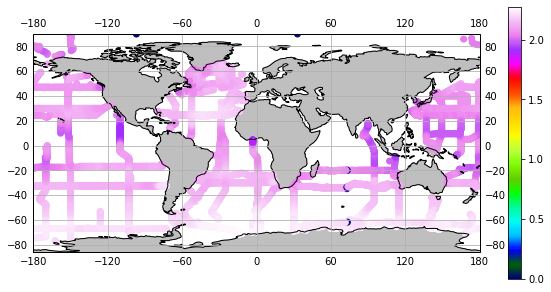

In [27]:
# plot surface data
plt.figure(figsize=[10,10])
m = plt.axes(projection=cart.crs.PlateCarree())
C = m.scatter(df['longitude'].values,df['latitude'].values,c=fld[0,0,:],cmap=cm.gist_ncar)
plt.colorbar(C,shrink=0.5)
m.coastlines()
m.add_feature(cart.feature.LAND, facecolor='0.75')
# m.set_extent([-75, -30, 30, 65], crs=cart.crs.PlateCarree())
gl = m.gridlines(draw_labels=True)

In [28]:
ovar

<xarray.DataArray 'dissic' (time: 12, depth: 45, j: 291, i: 360)>
dask.array<getitem, shape=(12, 45, 291, 360), dtype=float32, chunksize=(9, 45, 291, 360), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2004-12-01 2005-01-01 ... 2006-02-01
    member_id  <U9 'r10i1p1f1'
    lat        (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
    lon        (j, i) float32 dask.array<chunksize=(291, 360), meta=np.ndarray>
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    history:        mltby1em3
    long_name:      Dissolved Inorganic Carbon Concentration
    original_name:  DIC


In [29]:
sampled_var = xr.DataArray(fld,
                           
                           dims=['time','depth','all_stations'],
                           
                           coords={'time':ovar['time'],
                                   'depth':ovar['depth'],
                                   'all_stations':df.index.values,
                                   'dx':('all_stations',df.dx.values),
                                   'bearing':('all_stations',df.bearing.values),
                                   'lat':('all_stations',df.latitude.values),
                                   'lon':('all_stations',df.longitude.values),
                                  },
                           
                           attrs={'units':ovar.units,
                                  'long_name':ovar.long_name
                                 }
                          )

sampled_var

<xarray.DataArray (time: 12, depth: 45, all_stations: 9470)>
array([[[2.22988691, 2.23186737, 2.23335947, ..., 2.17942071,
                nan,        nan],
        [2.22990035, 2.23188518, 2.23338193, ..., 2.1793973 ,
                nan,        nan],
        [2.22991358, 2.23190077, 2.23339994, ..., 2.17938877,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[2.22844418, 2.23071154, 2.23247155, ..., 2.18168628,
                nan,        nan],
        [2.22847169, 2.23072841, 2.23248778, ..., 2.18165856,
                nan,        nan],
        [2.22848777, 2.23074024, 2.23249956, ..., 2.18164415,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..

In [30]:
expc = pd.read_csv('../../qc/FILTERED_GLODAP_EXPOCODE.csv')

In [31]:
for cruise_id in df[df.year==2005].groupby('cruise').mean().reset_index().cruise:

    print(expc[expc.ID == cruise_id].EXPOCODE.values[0])
    
    cruise_x = df[df.cruise==cruise_id]
    
    section_dates = [dateutil.parser.parse(date) - pd.Timedelta('15 day') for date in cruise_x.dates]
    section_dates = xr.DataArray(section_dates,dims='station')
    
    stations = cruise_x.index
    stations = xr.DataArray(stations,dims='station')
    
    section = sampled_var.sel(all_stations = stations, time=section_dates)
    section.attrs['expocode'] = expc[expc.ID == cruise_id].EXPOCODE.values[0]
    section.name = ovar.name
    section.to_netcdf(f'../../../sections/{ovar.name}_{model}_{realization}_{section.expocode}.nc')

06AQ20050122
09AR20041223
18HU20050526
49NZ20050525
49NZ20051031


In [32]:
section

<xarray.DataArray 'dissic' (station: 220, depth: 45)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [2.10365413, 2.10362648, 2.10359545, ...,        nan,        nan,
               nan],
       ...,
       [2.00596916, 2.00597224, 2.0059784 , ...,        nan,        nan,
               nan],
       [2.00480182, 2.00480494, 2.00481044, ...,        nan,        nan,
               nan],
       [2.00476066, 2.00476433, 2.00477009, ...,        nan,        nan,
               nan]])
Coordinates:
    time          (station) datetime64[ns] 2005-10-01 2005-10-01 ... 2006-01-01
  * depth         (depth) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
    all_stations  (station) int64 5638 5639 5640 5641 ... 5854 5855 5856 5857
    dx            (station) float64 0.0 9.458 8.03 16.16 ... 27.95 30.74 11.06
    bearing       (station) float64 0.0 98.

In [34]:
ds = sampled_var.to_dataset(name=ovar.name)
ds.to_netcdf(f'../../../sections/{ovar.name}_{model}_{realization}.nc')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


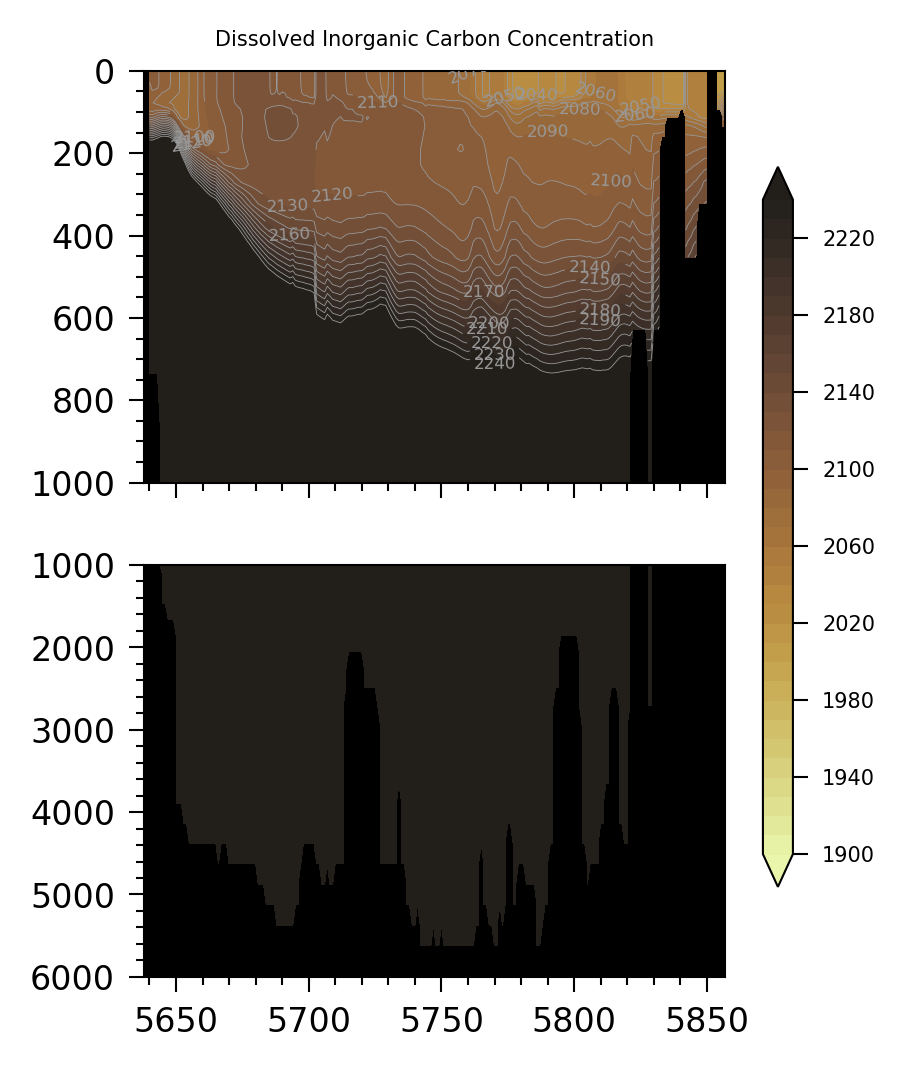

In [36]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

minvalue_conc,maxvalue_conc,cmap,nsteps,labelstep,cfactor = cprops[ovar.name]

cstep = abs(minvalue_conc-maxvalue_conc)/nsteps

cbarstep = abs(minvalue_conc-maxvalue_conc)/(nsteps/4);

contour_levs = np.arange(minvalue_conc,maxvalue_conc+cstep,cstep)

contour_labels = np.arange(minvalue_conc,maxvalue_conc+cstep,labelstep)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.dpi=300
fig.set_figheight(4)
fig.set_figwidth(2.5)
ax1.set_title(f'{section.long_name}',fontsize=5)
cax = ax1.contourf(section.station,section.depth,section.T*cfactor,levels=contour_levs,extend='both',cmap=cmap)
ax2.contourf(section.station,section.depth,section.T*1e3,levels=contour_levs,extend='both',cmap=cmap)

cs1 = ax1.contour(section.station,section.depth,section.T*cfactor,levels=contour_levs,extend='both',colors='0.6',linewidths=0.2)
ax1.clabel(cs1,fontsize=4,fmt='%1.f')

cs2 = ax2.contour(section.station,section.depth,section.T*cfactor,levels=contour_levs,extend='both',colors='0.6',linewidths=0.2)
ax2.clabel(cs2,fontsize=4,fmt='%1.f')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(0.5)
    ax2.spines[axis].set_linewidth(0.5)
    
ax1.tick_params(which='both', width=0.5)
ax2.tick_params(which='both', width=0.5)

ax1.set_facecolor('k')
ax2.set_facecolor('k')
ax1.set_ylim(1000,0)
ax2.set_ylim(6000,1000)
# ax1.tick_params(which='minor', length=4, color='r')

# plt.tight_layout()

cbar_ax = fig.add_axes([0.95, 0.2, 0.04, 0.6])
cbar = fig.colorbar(cax, cax=cbar_ax,extend='both')
cbar.ax.tick_params(labelsize=5)
cbar.ax.tick_params(which='both', width=0.5)
cbar.outline.set_linewidth(0.5)

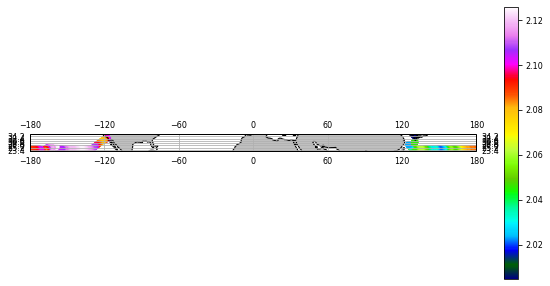

In [37]:
# plot surface data
plt.figure(figsize=[10,10])
m = plt.axes(projection=cart.crs.PlateCarree())
C = m.scatter(df[df.cruise==cruise_id]['longitude'].values,df[df.cruise==cruise_id]['latitude'].values,c=section[:,0],cmap=cm.gist_ncar)
plt.colorbar(C,shrink=0.5)
m.coastlines()
m.add_feature(cart.feature.LAND, facecolor='0.75')
# m.set_extent([-75, -30, 30, 65], crs=cart.crs.PlateCarree())
gl = m.gridlines(draw_labels=True)